# Weather Dataset 

<b>importing important libraries<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from scipy.stats import skew,normaltest
from sklearn.decomposition import PCA

<b>Importing dataset<b>

In [2]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## Data Preprocessing

### Missing Values
#### 1 & 2
<b>Question1:   
	Identify and list all columns in the dataset that have missing values.     
	Question2:    
	Calculate the percentage of missing values for each column in the dataset.</b>

In [3]:
print(df.isna().sum())
per_miss=((df.isna().sum().sum())/df.shape[1])*100
print('Percentage of missing values in the dataset is ',per_miss)

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Percentage of missing values in the dataset is  0.0


<i>There is no missing value in this data set<i>

#### 3
<b>Question:</b> 
<b>For the Max Temperature column, how would you handle the missing values? Describe your approach. </b>     
<b>Answere: </b>    
There is no missing value in max temperature column. However if there is a missing values in max temprature column. I will find the correlation between the other columns and temprature max column. Then i will use the column which has highest correlation with the max temprature column and will use machine learing model to pridict the value for the missing values in max temprature column and replace it with predicted value.     
<b>Application:</b>   
First lets remove a random value from max temprature column. Since there is no missimg value in the column.

In [4]:
print('The value in column temp_max and row 6 is',df.at[6,'temp_max'])
df.at[6,'temp_max']=np.nan
print('The value in column temp_max and row 6 is',df.at[6,'temp_max'])
df.isna().sum()

The value in column temp_max and row 6 is 7.2
The value in column temp_max and row 6 is nan


date             0
precipitation    0
temp_max         1
temp_min         0
wind             0
weather          0
dtype: int64

Now there is one missing value in temp_max column. For now lets make another dataframe as df1 where we will store the dataframe with no missing value. And find the correlation between all the columns

In [5]:
df1 = df.dropna()
df1.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
le=LabelEncoder()
df1['weather']=le.fit_transform(df1['weather'])
df1=df1.drop(columns=['date'],axis=1)
df1.corr()

C:\Users\Cv\AppData\Local\Temp\ipykernel_14652\555075431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weather']=le.fit_transform(df1['weather'])


,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.229086,-0.073055,0.327913,-0.267639
temp_max,-0.229086,1.000000,0.875580,-0.165535,0.322011
temp_min,-0.073055,0.875580,1.000000,-0.074712,0.154596
wind,0.327913,-0.165535,-0.074712,1.000000,-0.066160
weather,-0.267639,0.322011,0.154596,-0.066160,1.000000


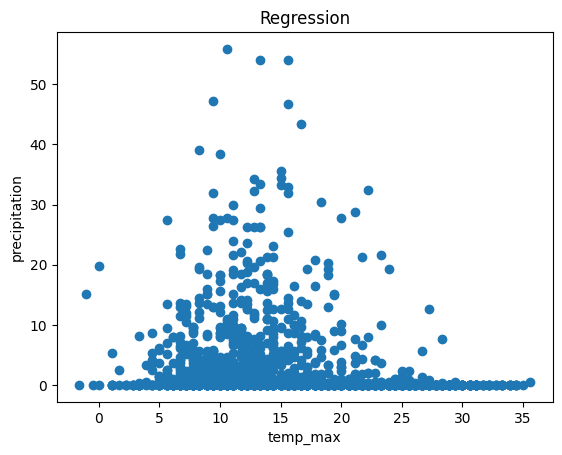

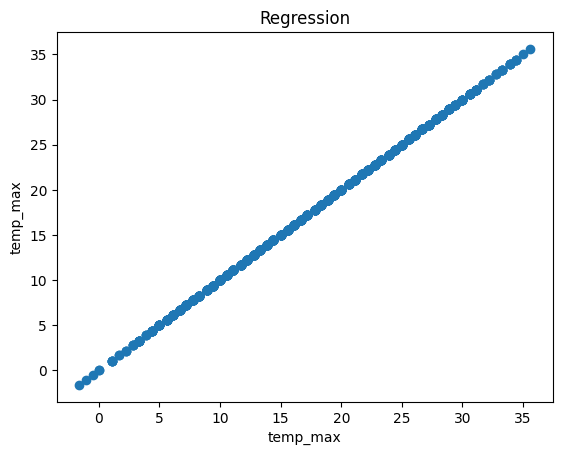

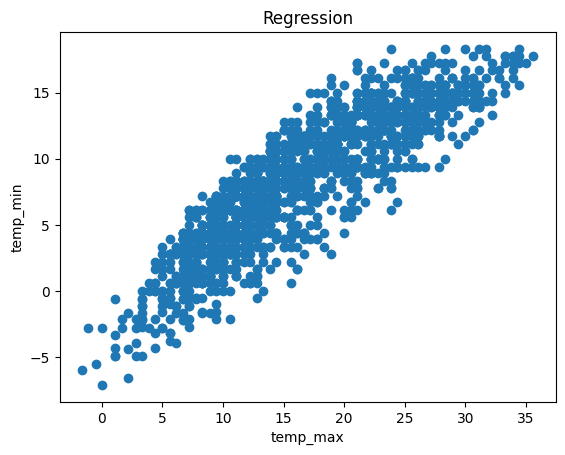

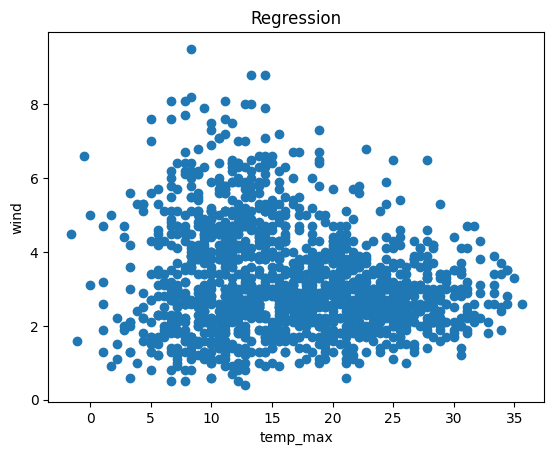

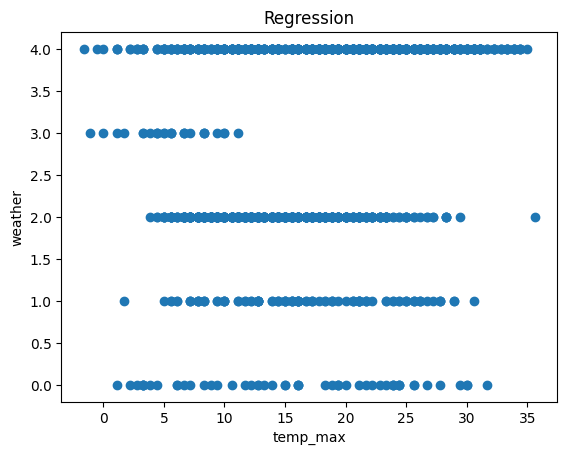

In [7]:
for i in df1.columns:
    plt.scatter(df1['temp_max'],df1[i])
    plt.xlabel('temp_max')
    plt.ylabel(i)
    plt.title('Regression')
    plt.show()

temp_max seem to have a strong correlation with temp_min. Thats why we will use temp_min feature to predict temp_max. Scince there is strong correlation and the target value (temp_max) is continuous. I will use linear regression model. I will use forward feature selection method to minimize the error.

In [8]:
x=df1[['precipitation','temp_min','wind','weather']]
y=df1['temp_max'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

All the features were selected to train the model. For maximum accuracy i can achieve from the data.

In [9]:
model=LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [10]:
y_pred=model.predict(x_test)

In [11]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('The mean square error is :',mse)
print('The R2 score is :',r2)

The mean square error is : 9.520435437108231
The R2 score is : 0.8399415547280284


Filling the null value in temp_max column by predicting the value from the machine learning model.

In [12]:
df['weather']=le.fit_transform(df['weather'])
df2=df[df['temp_max'].isnull() == True]
df3=df2.drop(columns=['temp_max','date'],axis=1)
pred=model.predict(df3)
df2['temp_max']=pred
df2

C:\Users\Cv\AppData\Local\Temp\ipykernel_14652\2519505675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['temp_max']=pred


,date,precipitation,temp_max,temp_min,wind,weather
6,2012-01-07,0.0,9.835235,2.8,2.3,2


Adding the predicted value in the dataframe.

In [13]:
print(df.isna().sum())
df.update(df2[['temp_max']])
print(df.isna().sum())

date             0
precipitation    0
temp_max         1
temp_min         0
wind             0
weather          0
dtype: int64
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [14]:
print('The values of 6th row are :',df.iloc[6])

The values of 6th row are : date             2012-01-07
precipitation           0.0
temp_max           9.835235
temp_min                2.8
wind                    2.3
weather                   2
Name: 6, dtype: object


#### 4
<b>Question:   
For the Precipitation column, how would you impute missing values? What method would you choose and why?</b>

In [15]:
df=df.drop(columns='date',axis=1)
df.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.228727,-0.072684,0.328045,-0.267388
temp_max,-0.228727,1.000000,0.875653,-0.165061,0.322267
temp_min,-0.072684,0.875653,1.000000,-0.074185,0.154981
wind,0.328045,-0.165061,-0.074185,1.000000,-0.065858
weather,-0.267388,0.322267,0.154981,-0.065858,1.000000


Precipitation have weak correlation with other features. Hence appliying machine learning model will be a lot of effort for nothing thats why i will find the mean of the data and fill the missing value with the mean.the code that i will use for it is:     
df['precipitation'].fillna(df['precipiation']mean())

#### 5
<b>Question:    
How would you handle missing values in the Wind Speed column for the dataset?</b>

just like the precipitation column. The correlation of wind speed column with other column is weak. Thats why ill use the same method as precipitation column.

### Outlier Handling
#### 1
<b>Question:   
Identify outliers in the max and min Temperature column using a suitable method (e.g., Z-score or IQR). Describe your findings.</b>

In [16]:
for i in df.columns:
    print(f'skewness of column ({i}) :',skew(df[i]))

skewness of column (precipitation) : 3.502043466505449
skewness of column (temp_max) : 0.28099250286261956
skewness of column (temp_min) : -0.24920236092580825
skewness of column (wind) : 0.8907517881858251
skewness of column (weather) : -0.2744571822852832


In [17]:
for i in df.columns:
    print(f'Result of normal test of column ({i}) :',normaltest(df[i]))

Result of normal test of column (precipitation) : NormaltestResult(statistic=np.float64(1106.3581061502698), pvalue=np.float64(5.719917238138339e-241))
Result of normal test of column (temp_max) : NormaltestResult(statistic=np.float64(90.62472514108451), pvalue=np.float64(2.0945511649320657e-20))
Result of normal test of column (temp_min) : NormaltestResult(statistic=np.float64(61.37766489360388), pvalue=np.float64(4.699042925532965e-14))
Result of normal test of column (wind) : NormaltestResult(statistic=np.float64(168.41249858572968), pvalue=np.float64(2.689617924206707e-37))
Result of normal test of column (weather) : NormaltestResult(statistic=np.float64(421.91194934455353), pvalue=np.float64(2.4153733783719196e-92))


Since both column temp_max and temp_min is not normal but positively and negetively skewed respectively. IQR method is more suitable.

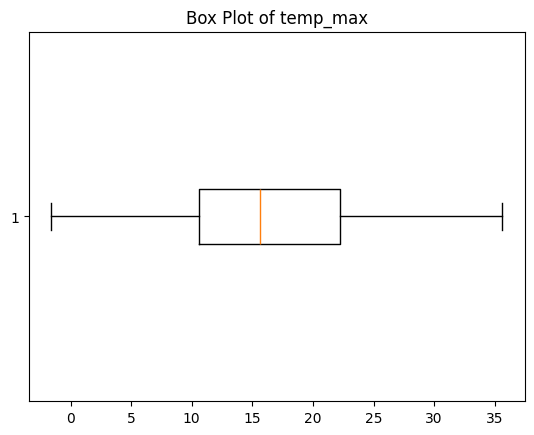

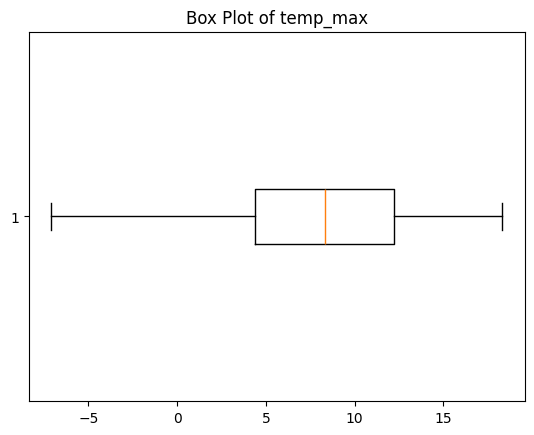

In [18]:
plt.boxplot(df['temp_max'],vert=False)
plt.title('Box Plot of temp_max')
plt.show()
plt.boxplot(df['temp_min'],vert=False)
plt.title('Box Plot of temp_max')
plt.show()

In [19]:
Q1 = df['temp_max'].quantile(0.25)
Q3 = df['temp_max'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['temp_max'] < lower_bound) | (df['temp_max'] > upper_bound) ]
print('No of outliers in temp_max',outliers.shape[0])
df['temp_max'].clip(lower_bound,upper_bound)

No of outliers in temp_max 0


In [20]:
Q1 = df['temp_min'].quantile(0.25)
Q3 = df['temp_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['temp_min'] < lower_bound) | (df['temp_min'] > upper_bound) ]
print('No of outliers in temp_min:',outliers.shape[0])

No of outliers in temp_min: 0


<b>Findings:</b>   
There is no outlier in both temp_max and temp_min column.

#### 2
<b>Question:    
How would you handle outliers in the Precipitation column? Explain your approach.</b>

The data in precipation colum is not normal and is positively skewed. Hence we can find the ouliers using IQR method.

In [77]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['precipitation'] < lower_bound) | (df['precipitation'] > upper_bound) ]
print('No of outliers in precipitation',outliers.shape[0])

7.124999999999999
No of outliers in precipitation 203


#### 3
<b>Question:   
Discuss the impact of outliers on the Wind Speed feature. Should you remove or transform these outliers?</b>

In [22]:
Q1 = df['wind'].quantile(0.25)
Q3 = df['wind'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['wind'] < lower_bound) | (df['wind'] > upper_bound) ]
filtered_data = df[ (df['wind'] >= lower_bound) & (df['wind'] <= upper_bound) ]
print('No of outliers in wind',outliers.shape[0])

No of outliers in wind 34


In [23]:
print('Orignal Data')
print(df['wind'].describe())
print('Data after removing outliers')
print(filtered_data['wind'].describe())

Orignal Data
count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64
Data after removing outliers
count    1427.000000
mean        3.139313
std         1.288460
min         0.400000
25%         2.200000
50%         2.900000
75%         3.900000
max         6.600000
Name: wind, dtype: float64


There is only a little impact on the data after removing the outliers. There is little decrease in the mean, standard deviation, quartile 2 & 3 and max value. This information shows there was no outlier smaller than lower bound. All the ouliers are greater than upper bound. There is decrease in varience after the removal of outliers. Where as for a better machine learning model the varience of the feature should be as maximum as possible for better functioning of the model. Secondly the average wind speed is 9.0 m/s. Here the maximum value after removing the outliers is 6.6. Hence i will not remove the outliers from the data.

#### 4
<b>Question    
Visualize the outliers in the Humidity column using box plots. What insights can you gain?</b>    
The formula for calculating humidity is:   
Humidity= (e/es(max))×100    
where  
e is actual vapor pressure    
es is saturation vapor pressure   
es(max) = 6.11×10 ^ ((7.5×T(max)) / (237.3+T(max)) )
T is in celcius

In [24]:
df1['es_max'] = 6.11 * 10 ** ( (7.5 * df['temp_max']) / (237.3 + df['temp_max']))
df1['e'] = 6.11 * 10 ** ( (7.5 * ((df['temp_max'] + df['temp_min']) / 2)) / (237.3 + ((df['temp_max'] + df['temp_min']) / 2)))
df['humidity'] = (df1['e'] / df1['es_max']) * 100
df['humidity'] = df['humidity'].clip(0, 100)
print(df.isna().sum())
df=df.dropna()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
humidity         1
dtype: int64


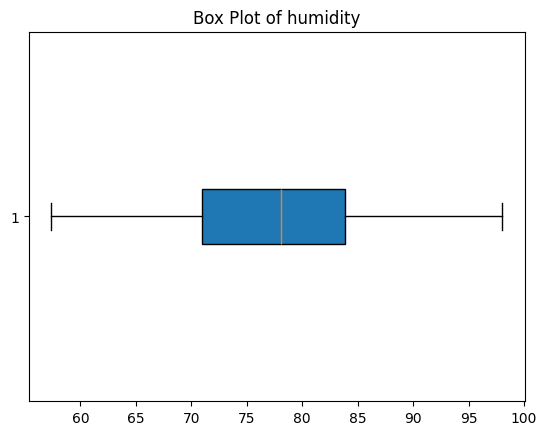

In [25]:
plt.boxplot(df['humidity'],vert=False,patch_artist=True)
quartiles = df['humidity'].quantile([0.25, 0.5, 0.75])
plt.title('Box Plot of humidity')
plt.show()

The box plot shows that data of column hummidity is negitively skewed. Since the Q2 line seem to be closer to the Q3.

####  5    
<b>Question:   
How does scaling affect outlier detection in the Temperature column? Apply scaling and observe the changes</b>

In [26]:
scalar = StandardScaler()
df['Scaled temp_max']=scalar.fit_transform(df['temp_max'].values.reshape(-1,1))
df['Scaled temp_min']=scalar.fit_transform(df['temp_min'].values.reshape(-1,1))

In [27]:
print('skewness of column scaled temp_max :',skew(df['Scaled temp_max']))
print('Result of normal test of column scaled temp_max :',normaltest(df['Scaled temp_max']))
print('skewness of column scaled temp_min :',skew(df['Scaled temp_min']))
print('Result of normal test of column scaled temp_min :',normaltest(df['Scaled temp_min']))

skewness of column scaled temp_max : 0.2797801772898329
Result of normal test of column scaled temp_max : NormaltestResult(statistic=np.float64(90.46179649574506), pvalue=np.float64(2.272325171798905e-20))
skewness of column scaled temp_min : -0.25077271710096943
Result of normal test of column scaled temp_min : NormaltestResult(statistic=np.float64(61.04758073269309), pvalue=np.float64(5.5422521064886333e-14))


Applying IQR method to find outliers because temp_max and temp_min column is skewed.

In [28]:
Q1 = df['Scaled temp_max'].quantile(0.25)
Q3 = df['Scaled temp_max'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['Scaled temp_max'] < lower_bound) | (df['Scaled temp_max'] > upper_bound) ]
print('No of outliers in Scaled temp_max',outliers.shape[0])
Q1 = df['Scaled temp_min'].quantile(0.25)
Q3 = df['Scaled temp_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['Scaled temp_min'] < lower_bound) | (df['Scaled temp_min'] > upper_bound) ]
print('No of outliers in Scaled temp_min',outliers.shape[0])

No of outliers in Scaled temp_max 0
No of outliers in Scaled temp_min 0


There is no change in the detection of outliers. Because the no of of outliers before and after applying standard scaling is same (0) .

### Scaling and Transformation
#### 1
<b>Question:
Scale the Temperature feature using Min-Max Scaling. How does this affect the feature's distribution?</b>

In [29]:
scalar = MinMaxScaler()
df['Scaled temp_max']=scalar.fit_transform(df['temp_max'].values.reshape(-1,1))
df['Scaled temp_min']=scalar.fit_transform(df['temp_min'].values.reshape(-1,1))

In [30]:
print('Correlation:')
print(df.corr())
print('Statistic Information:')
print(df.describe())
print('skewness of column scaled temp_max :',skew(df['Scaled temp_max']))
print('skewness of column temp_max :',skew(df['temp_max']))
print('Result of normal test of column scaled temp_max :',normaltest(df['Scaled temp_max']))
print('Result of normal test of column  temp_max :',normaltest(df['temp_max']))
print('skewness of column scaled temp_min :',skew(df['Scaled temp_min']))
print('skewness of column temp_min :',skew(df['temp_min']))
print('Result of normal test of column scaled temp_min :',normaltest(df['Scaled temp_min']))
print('Result of normal test of column temp_min :',normaltest(df['temp_min']))

Correlation:
                 precipitation  temp_max  temp_min      wind   weather  \
precipitation         1.000000 -0.229086 -0.073055  0.327913 -0.267639   
temp_max             -0.229086  1.000000  0.875580 -0.165535  0.322011   
temp_min             -0.073055  0.875580  1.000000 -0.074712  0.154596   
wind                  0.327913 -0.165535 -0.074712  1.000000 -0.066160   
weather              -0.267639  0.322011  0.154596 -0.066160  1.000000   
humidity              0.355319 -0.702175 -0.274538  0.223617 -0.411091   
Scaled temp_max      -0.229086  1.000000  0.875580 -0.165535  0.322011   
Scaled temp_min      -0.073055  0.875580  1.000000 -0.074712  0.154596   

                 humidity  Scaled temp_max  Scaled temp_min  
precipitation    0.355319        -0.229086        -0.073055  
temp_max        -0.702175         1.000000         0.875580  
temp_min        -0.274538         0.875580         1.000000  
wind             0.223617        -0.165535        -0.074712  
weather   

There is no change feature of distribution in the temp_max and temp_min column after applying Min Max standard scalling. Hence scaling does not change any feature's distribution.

#### 2
<b>Question:   
Standardize the Precipitation feature. What is the mean and standard deviation after standardization?</b>

In [31]:
scalar = StandardScaler()
df['Scaled precipitation']=scalar.fit_transform(df['precipitation'].values.reshape(-1,1))
print('statistical information of precipitation column before applying scaling :')
print(df['precipitation'].describe())
print('statistical information of precipitation column after applying scaling :')
print(df['Scaled precipitation'].describe())

statistical information of precipitation column before applying scaling :
count    1460.000000
mean        3.031507
std         6.682012
min         0.000000
25%         0.000000
50%         0.000000
75%         2.850000
max        55.900000
Name: precipitation, dtype: float64
statistical information of precipitation column after applying scaling :
count    1.460000e+03
mean     1.216683e-17
std      1.000343e+00
min     -4.538372e-01
25%     -4.538372e-01
50%     -4.538372e-01
75%     -2.717281e-02
max      7.914773e+00
Name: Scaled precipitation, dtype: float64


After standardizing the precipitation feature, the mean becomes very close to 0 and the standard deviation becomes very close to 1.

#### 3   
<b>Question:    
Apply a logarithmic transformation to the Wind Speed feature if needed. Describe the impact on the feature's distribution.</b>

In [32]:
df['transformed_wind'] = np.log1p(df['wind']) 

In [33]:
print('The skewness of wind feature before applying tansformation :',skew(df['wind']))
print('The skewness of wind feature after applying tansformation :',skew(df['transformed_wind']))
print('The Varience of wind feature before applying tansformation :',df['wind'].var())
print('The Varience of wind feature after applying tansformation :',df['transformed_wind'].var())
print('The standard deviation of wind feature before applying tansformation :',df['wind'].std())
print('The standard deviation of wind feature after applying tansformation :',df['transformed_wind'].std())


The skewness of wind feature before applying tansformation : 0.8896862550955184
The skewness of wind feature after applying tansformation : -0.012021258302036385
The Varience of wind feature before applying tansformation : 2.068150356314608
The Varience of wind feature after applying tansformation : 0.11056604986030637
The standard deviation of wind feature before applying tansformation : 1.4381065177220387
The standard deviation of wind feature after applying tansformation : 0.3325147363054852


The skewness in wind column has been decreased

### Feature engineering   
#### 1   
<b>Question:   
Create a new feature that represents the Temperature in Celsius from the given Fahrenheit values. Describe the transformation applied.</b>    
The temp_min and temp_max column is in celcius to convert it into farenheit the formula given below will be used to transform the data:  
Temp(F) = (Temp(C) * 1.8 ) + 32

In [34]:
df['temp_max(F)'] = (df['temp_max'] *  1.8 ) + 32
df['temp_min(F)'] = (df['temp_min'] *  1.8 ) + 32

In [35]:
df

,precipitation,temp_max,temp_min,wind,weather,humidity,Scaled temp_max,Scaled temp_min,Scaled precipitation,transformed_wind,temp_max(F),temp_min(F)
0,0.0,12.8,5.0,4.7,0,77.139102,0.387097,0.476378,-0.453837,1.740466,55.04,41.00
1,10.9,10.6,2.8,4.5,2,76.780121,0.327957,0.389764,1.177967,1.704748,51.08,37.04
2,0.8,11.7,7.2,2.3,2,86.064570,0.357527,0.562992,-0.334072,1.193922,53.06,44.96
3,20.3,12.2,5.6,4.7,2,80.239382,0.370968,0.500000,2.585211,1.740466,53.96,42.08
4,1.3,8.9,2.8,6.1,2,81.156467,0.282258,0.389764,-0.259218,1.960095,48.02,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,90.916103,0.161290,0.346457,0.833641,1.360977,39.92,35.06
1457,1.5,5.0,1.7,1.3,2,89.050819,0.177419,0.346457,-0.229277,0.832909,41.00,35.06
1458,0.0,7.2,0.6,2.6,1,79.507804,0.236559,0.303150,-0.453837,1.280934,44.96,33.08
1459,0.0,5.6,-1.0,3.4,4,79.265523,0.193548,0.240157,-0.453837,1.481605,42.08,30.20


#### 2
<b>Question: 
Generate an interaction term between Humidity and Wind Speed. How does this new feature impact the dataset?</b>

In [36]:
df['humidity_wind'] = df['humidity'] * df['wind']

In [37]:
df1 = df
df1=df1.drop(columns=['Scaled temp_max','Scaled temp_min','Scaled precipitation','transformed_wind'],axis=1)
df1.corr()

,precipitation,temp_max,temp_min,wind,weather,humidity,temp_max(F),temp_min(F),humidity_wind
precipitation,1.000000,-0.229086,-0.073055,0.327913,-0.267639,0.355319,-0.229086,-0.073055,0.385582
temp_max,-0.229086,1.000000,0.875580,-0.165535,0.322011,-0.702175,1.000000,0.875580,-0.297688
temp_min,-0.073055,0.875580,1.000000,-0.074712,0.154596,-0.274538,0.875580,1.000000,-0.123754
wind,0.327913,-0.165535,-0.074712,1.000000,-0.066160,0.223617,-0.165535,-0.074712,0.975086
weather,-0.267639,0.322011,0.154596,-0.066160,1.000000,-0.411091,0.322011,0.154596,-0.147107
humidity,0.355319,-0.702175,-0.274538,0.223617,-0.411091,1.000000,-0.702175,-0.274538,0.416975
temp_max(F),-0.229086,1.000000,0.875580,-0.165535,0.322011,-0.702175,1.000000,0.875580,-0.297688
temp_min(F),-0.073055,0.875580,1.000000,-0.074712,0.154596,-0.274538,0.875580,1.000000,-0.123754
humidity_wind,0.385582,-0.297688,-0.123754,0.975086,-0.147107,0.416975,-0.297688,-0.123754,1.000000


The correlation of humidity_wind feature with other feature is more than both humidity and wind feature correlation. Hence the new feature generated by the interation of humidity and wind feature named humidity_wind will provide better result in machine learning model.

#### 3
<b>Question:   
Encode the Weather Condition categorical feature using one-hot encoding. What new columns are created?</b>

In [38]:
df4=pd.read_csv('seattle-weather.csv')
df4 = pd.get_dummies(df4,columns=['weather'])
df4

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,True,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,False,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,False,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,False,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,False,False,True,False,False
1457,2015-12-28,1.5,5.0,1.7,1.3,False,False,True,False,False
1458,2015-12-29,0.0,7.2,0.6,2.6,False,True,False,False,False
1459,2015-12-30,0.0,5.6,-1.0,3.4,False,False,False,False,True


The new column generated are weather_drizzle, weather_fog, weather_rain, weather_snow and weather_sun.

### Feature Selection   
#### 1    
<b>Question:   
Use a correlation matrix to determine the relationship between Temperature, Precipitation, and Wind Speed. Which features are strongly correlated?</b>

In [39]:
df5 = df[['temp_max','temp_min','precipitation','wind']]
df5.corr()

,temp_max,temp_min,precipitation,wind
temp_max,1.000000,0.875580,-0.229086,-0.165535
temp_min,0.875580,1.000000,-0.073055,-0.074712
precipitation,-0.229086,-0.073055,1.000000,0.327913
wind,-0.165535,-0.074712,0.327913,1.000000


temp_max and temp_min features are strongly correlated.

#### 2
<b>Question:  
Apply Recursive Feature Elimination (RFE) to select the most important features for predicting Temperature. Describe the selected features.</b>

In [40]:
df

,precipitation,temp_max,temp_min,wind,weather,humidity,Scaled temp_max,Scaled temp_min,Scaled precipitation,transformed_wind,temp_max(F),temp_min(F),humidity_wind
0,0.0,12.8,5.0,4.7,0,77.139102,0.387097,0.476378,-0.453837,1.740466,55.04,41.00,362.553779
1,10.9,10.6,2.8,4.5,2,76.780121,0.327957,0.389764,1.177967,1.704748,51.08,37.04,345.510547
2,0.8,11.7,7.2,2.3,2,86.064570,0.357527,0.562992,-0.334072,1.193922,53.06,44.96,197.948511
3,20.3,12.2,5.6,4.7,2,80.239382,0.370968,0.500000,2.585211,1.740466,53.96,42.08,377.125093
4,1.3,8.9,2.8,6.1,2,81.156467,0.282258,0.389764,-0.259218,1.960095,48.02,37.04,495.054446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,90.916103,0.161290,0.346457,0.833641,1.360977,39.92,35.06,263.656699
1457,1.5,5.0,1.7,1.3,2,89.050819,0.177419,0.346457,-0.229277,0.832909,41.00,35.06,115.766065
1458,0.0,7.2,0.6,2.6,1,79.507804,0.236559,0.303150,-0.453837,1.280934,44.96,33.08,206.720292
1459,0.0,5.6,-1.0,3.4,4,79.265523,0.193548,0.240157,-0.453837,1.481605,42.08,30.20,269.502778


In [41]:
x = df.drop(columns=['temp_max','Scaled temp_max','Scaled temp_min','temp_max(F)','temp_min(F)'])
y = df['temp_max']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [43]:
rfe = RFE(estimator=model, n_features_to_select=7)  
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [44]:
selected_features = x.columns[rfe.support_]
print("Selected features: ", selected_features)
print('Feacture Ranking',rfe.ranking_)
model.fit(x_train[selected_features],y_train)
y_pred = model.predict(x_test[selected_features])

Selected features:  Index(['precipitation', 'temp_min', 'wind', 'weather', 'humidity',
       'transformed_wind', 'humidity_wind'],
      dtype='object')
Feacture Ranking [1 1 1 1 1 2 1 1]


In [45]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('The mean square error is :',mse)
print('The R2 score is :',r2)

The mean square error is : 0.13769714825225257
The R2 score is : 0.997685022747832


In [46]:
x = df.drop(columns=['temp_min','Scaled temp_max','Scaled temp_min','temp_max(F)','temp_min(F)'])
y = df['temp_min']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [48]:
rfe = RFE(estimator=model, n_features_to_select=7)  
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [49]:
selected_features = x.columns[rfe.support_]
print("Selected features: ", selected_features)
print('Feacture Ranking',rfe.ranking_)
model.fit(x_train[selected_features],y_train)
y_pred = model.predict(x_test[selected_features])


Selected features:  Index(['precipitation', 'temp_max', 'wind', 'weather', 'humidity',
       'transformed_wind', 'humidity_wind'],
      dtype='object')
Feacture Ranking [1 1 1 1 1 2 1 1]


In [50]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('The mean square error is :',mse)
print('The R2 score is :',r2)

The mean square error is : 0.11794635523124768
The R2 score is : 0.9958468492809627


#### 3
<b>Question:    
Perform Principal Component Analysis (PCA) on the features max and min Temperature, Precipitation, and Humidity. How many principal components are retained?</b>

In [51]:
x = df[['temp_max','temp_min','precipitation','humidity']]
scaler = StandardScaler()
x_Scaled =scaler.fit_transform(x)

In [52]:
pca = PCA(n_components=3)
x_pca= pca.fit_transform(x_Scaled)
pca_df = pd.DataFrame(data=x_pca,columns=['principal component 1','principal component 2','principal component 3'])
print('Pca result with 3 components:')
print(pca_df.head())
pca_df.to_csv('iris-pca-3-components.csv',index=False)

Pca result with 3 components:
   principal component 1  principal component 2  principal component 3
0              -0.513602              -0.776528              -0.046745
1              -1.344507               0.236113              -1.155983
2              -0.938666              -0.159186               0.831777
3              -1.491399               1.792931              -1.400275
4              -1.369508              -0.780374               0.006189


## Exploratory Data analysis (EDA)   
### Discriptive Analysis   
#### 1  
<b>Question:   
Calculate the mean, median, and standard deviation of the Temperature feature. Summarize these statistics.</b>

In [53]:
print('MAX TEMPRATURE')
print('mean :',df['temp_max'].mean())
print('median :',df['temp_max'].median())
print('standard deviation :',df['temp_max'].std())
print('MIN TEMPRATURE')
print('mean :',df['temp_min'].mean())
print('median :',df['temp_min'].median())
print('standard deviation :',df['temp_min'].std())

MAX TEMPRATURE
mean : 16.445410958904112
median : 15.6
standard deviation : 7.348293841476986
MIN TEMPRATURE
mean : 8.238493150684931
median : 8.3
standard deviation : 5.0227089979910255


#### 2
<b>Question   
Describe the distribution of the Precipitation feature over different seasons. Use histograms or density plots.</b>

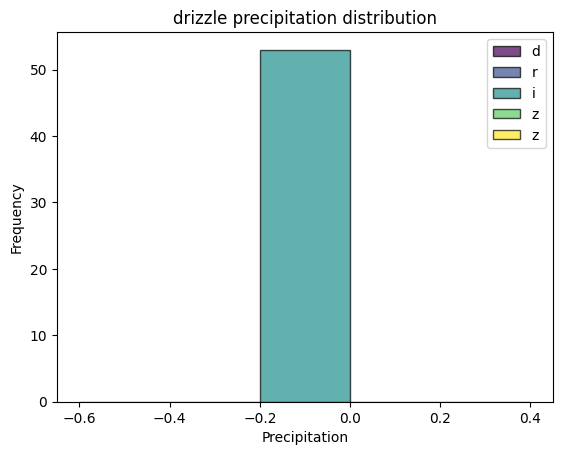

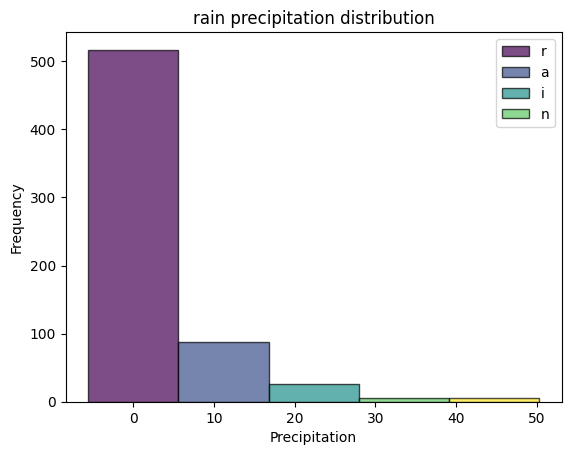

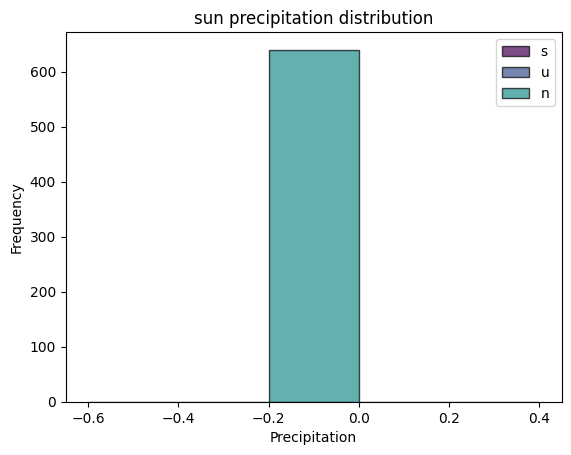

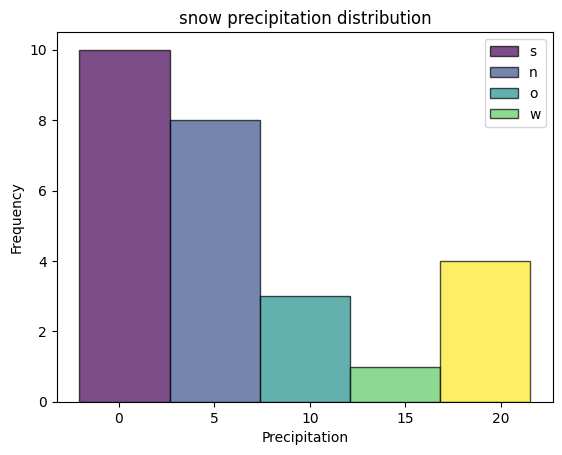

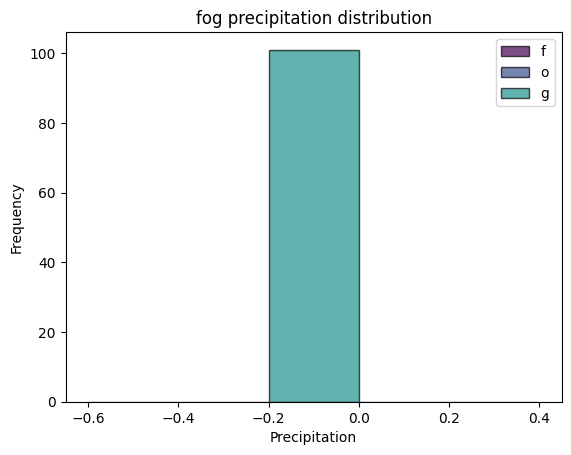

In [54]:
df1 = pd.read_csv('seattle-weather.csv')
weather=df1['weather'].unique()
bins=5
colors = plt.cm.viridis(np.linspace(0, 1, bins))
for i in weather:
    df2 = df1[df1['weather'] == i]
    hist, bin_edges = np.histogram(df2['precipitation'], bins=bins )
    for j in range(bins):
        plt.bar(bin_edges[j], hist[j], width=bin_edges[j+1] - bin_edges[j], color=colors[j], alpha=0.7, edgecolor='black')
    plt.title(f'{i} precipitation distribution')
    plt.xlabel('Precipitation')
    plt.ylabel('Frequency')
    plt.legend(f'{i}')
    plt.show()

#### 3  
<b>Question   
Compute summary statistics for the Wind Speed feature and compare them to Humidity.</b>

In [55]:
df6 = df[['wind','humidity']].describe()
print('Statistical Comparison of wind speed and hummidity')
df6 = pd.DataFrame(df6)
df6

Statistical Comparison of wind speed and hummidity


,wind,humidity
count,1460.000000,1460.000000
mean,3.241781,77.466497
std,1.438107,8.488373
min,0.400000,57.363964
25%,2.200000,71.006239
50%,3.000000,78.114007
75%,4.000000,83.870719
max,9.500000,98.016982


In [56]:
df7 = pd.read_csv('seattle-weather.csv')
df7['date'].unique()

array(['2012-01-01', '2012-01-02', '2012-01-03', ..., '2015-12-29',
       '2015-12-30', '2015-12-31'], dtype=object)

In [57]:
df7['date'] = pd.to_datetime(df7['date'])
df7['year'] = df7['date'].dt.year
df7['month'] = df7['date'].dt.month
df7

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12


In [58]:
a=df7['year'].unique()
a

array([2012, 2013, 2014, 2015], dtype=int32)

In [59]:
ls=[]
for i in range(2012,2016):
    for j in range (1,13):
        ls.append(f'{j}-{i}')
df8 = ls
df8 = pd.DataFrame(df8 , columns=['months-year'])
temp_max_avg =[]
temp_min_avg =[]
precipitation_avg =[]
for j in range (2012,2016):
    df9 = df7[df7['year'] == j]
    for i in range (1,13):
        temp_sum = df9.loc[df9['month'] == i, 'temp_max'].sum()
        temp_count = df9.loc[df9['month'] == i, 'temp_max'].shape[0]
        temp_max_avg.append(temp_sum / temp_count)
    for i in range (1,13):
        temp_sum = df9.loc[df9['month'] == i, 'temp_min'].sum()
        temp_count = df9.loc[df9['month'] == i, 'temp_min'].shape[0]
        temp_min_avg.append(temp_sum / temp_count)
    for i in range (1,13):
        temp_sum = df9.loc[df9['month'] == i, 'precipitation'].sum()
        temp_count = df9.loc[df9['month'] == i, 'precipitation'].shape[0]
        precipitation_avg.append(temp_sum / temp_count)
df8['temp_max_avg']=temp_max_avg
df8['temp_min_avg']=temp_min_avg
df8['precipitation_avg']=precipitation_avg
df8

,months-year,temp_max_avg,temp_min_avg,precipitation_avg
0,1-2012,7.054839,1.541935,5.590323
1,2-2012,9.275862,3.203448,3.182759
2,3-2012,9.554839,2.838710,5.903226
3,4-2012,14.873333,5.993333,2.270000
4,5-2012,17.661290,8.190323,1.683871
5,6-2012,18.693333,10.480000,2.503333
6,7-2012,22.906452,12.932258,0.848387
7,8-2012,25.858065,14.009677,0.000000
8,9-2012,22.880000,11.243333,0.030000
9,10-2012,15.829032,8.380645,5.493548


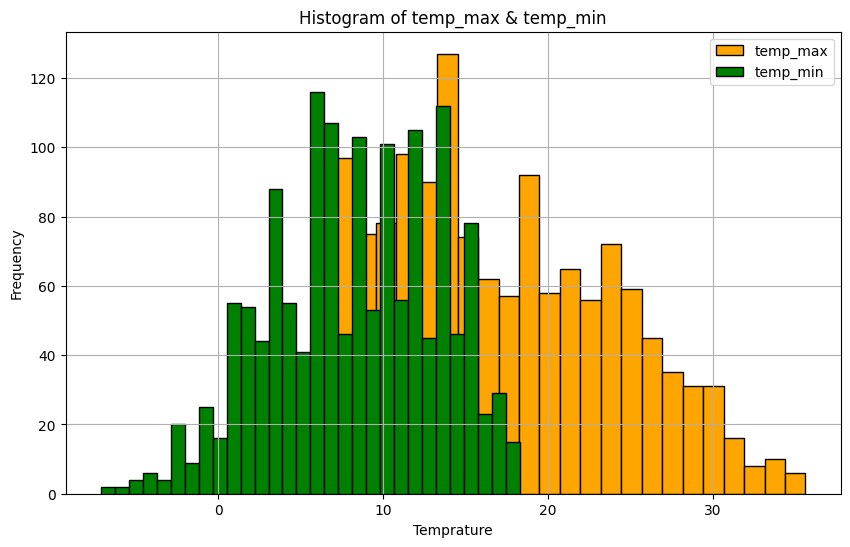

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(df['temp_max'], bins=30, edgecolor='black',color='orange',label='temp_max')
plt.hist(df['temp_min'], bins=30, edgecolor='black',color='green',label='temp_min')
plt.title('Histogram of temp_max & temp_min')
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

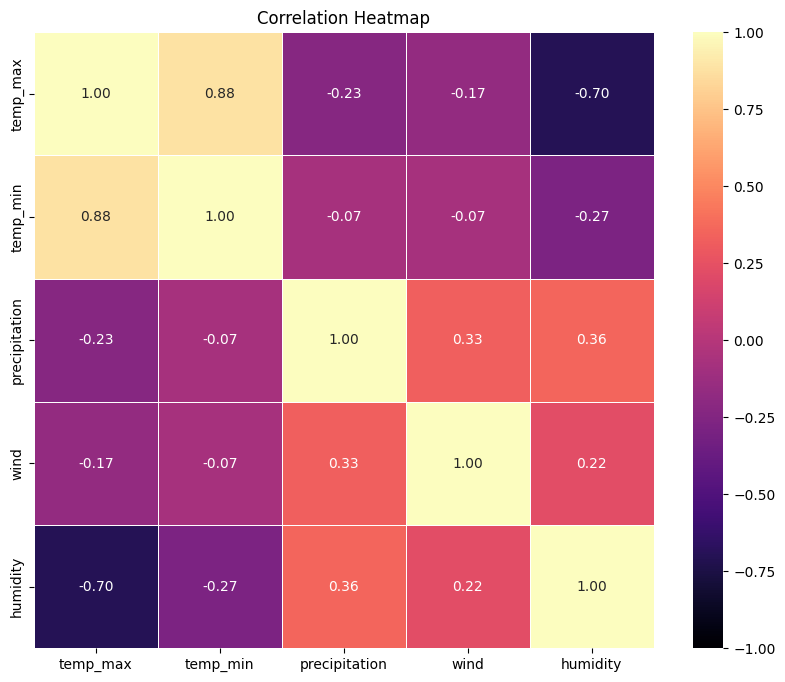

In [61]:
correlation_matrix = df[['temp_max','temp_min', 'precipitation', 'wind', 'humidity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [62]:
df1['date'].unique()

array(['2012-01-01', '2012-01-02', '2012-01-03', ..., '2015-12-29',
       '2015-12-30', '2015-12-31'], dtype=object)

In [64]:
df7 = pd.read_csv('seattle-weather.csv')
df7['date'] = pd.to_datetime(df7['date'])
df7['year']=df7['date'].dt.year

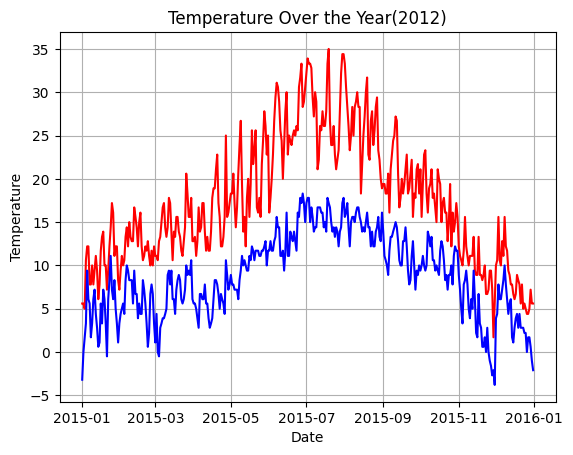

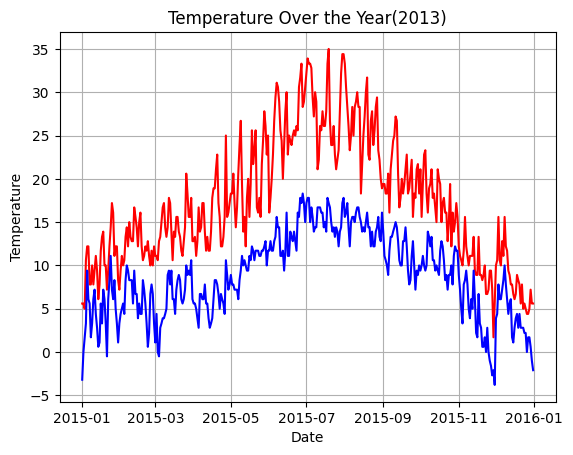

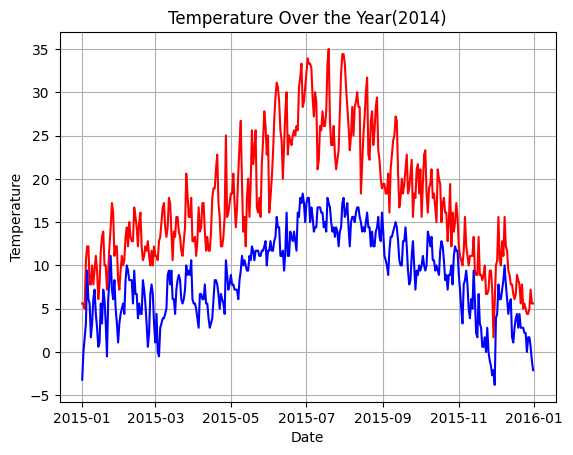

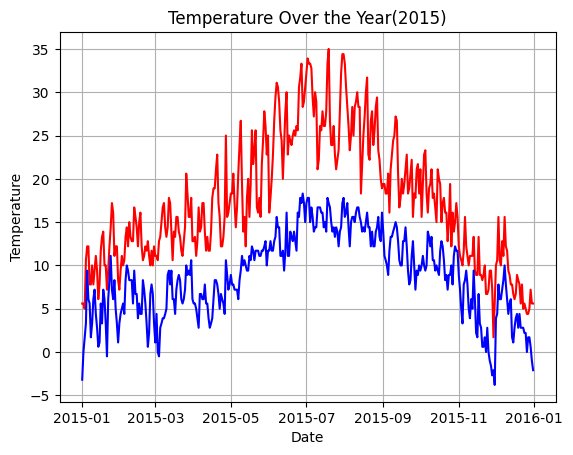

In [69]:
for i in range(2012,2016):
    df8 = df7[df7['year'] == j]
    plt.plot(df8['date'] , df8['temp_max'], color='red')
    plt.plot(df8['date'] , df8['temp_min'], color='blue')
    plt.title(f'Temperature Over the Year({i})')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.grid(True)
    plt.show()

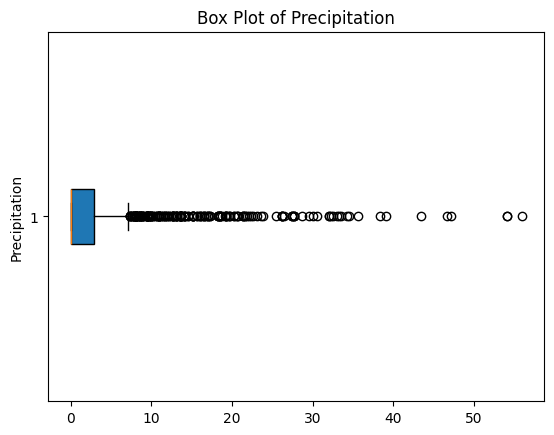

In [78]:
plt.boxplot(df['precipitation'],patch_artist=True,vert=False)
plt.title('Box Plot of Precipitation')
plt.ylabel('Precipitation')
plt.show()